In [1]:
import sys
sys.path.append("../codes/")
from Readfiles import getFnames
from DCdata import readReservoirDC
from SimPEG import DCIP as DC

%pylab inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    
Populating the interactive namespace from numpy and matplotlib


In [2]:
directory = "../data/ChungCheonDC/"
fnames = getFnames(directory, dtype="apr", minimumsize=7000.)

In [3]:
def vizDC(i):
    fname = fnames[i]
    survey = readReservoirDC(fname)
    fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
    DC.plot_pseudoSection(survey, ax, "dpdp", dtype="appr", clim=[52, 150.])
    ax.text(0,0,fname, fontsize=16)

In [4]:
def vizDCdiff(i,vmin=0.8, vmax=1.2):
    fname0 = fnames[0]
    fname1 = fnames[i]    
    survey0 = readReservoirDC(fname0)
    survey1 = readReservoirDC(fname1)
    temp_dobs = abs(survey1.dobs) / abs(survey0.dobs)
    survey1.dobs = temp_dobs
    fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
    DC.plot_pseudoSection(survey1, ax, "dpdp", dtype="appr", clim=[vmin, vmax])
    ax.text(0,0,fname0, fontsize=16)
    ax.text(50,0,fname1, fontsize=16)

In [5]:
from ipywidgets import interact, IntSlider, FloatSlider, FloatText

In [6]:
600 / 24

25

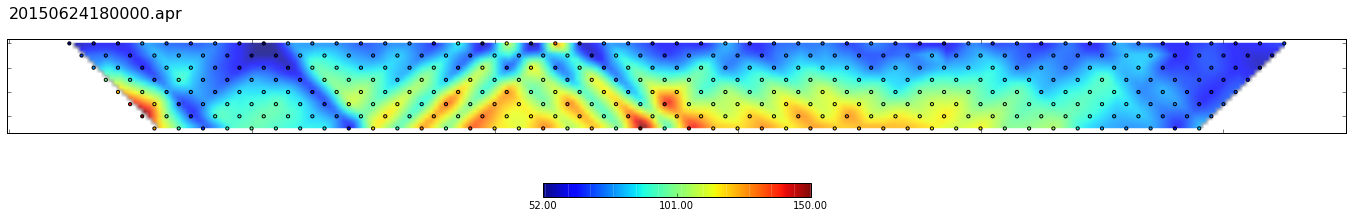

In [7]:
interact(vizDC, i=IntSlider(min=0, max=len(fnames)-1, step=100))

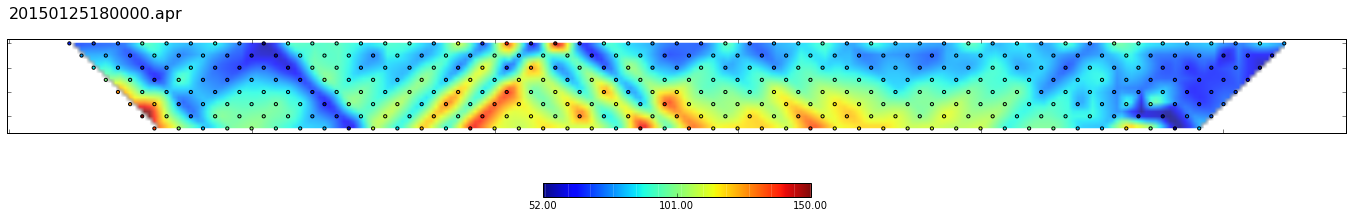

In [8]:
vizDC(100)

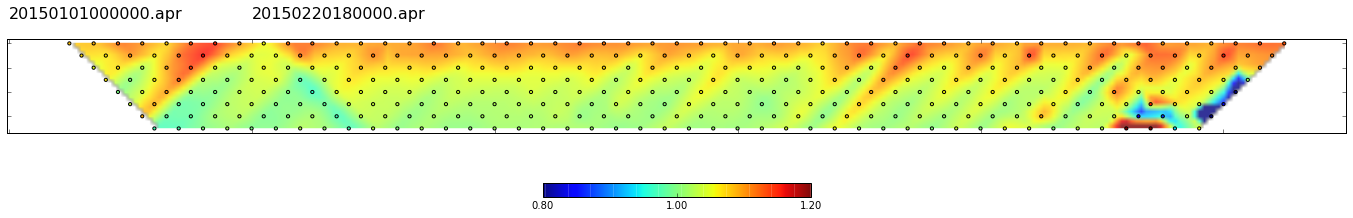

In [10]:
interact(vizDCdiff, i=IntSlider(min=0, max=len(fnames)-1, step=50), 
        vmin = FloatText(value=0.8), 
        vmax = FloatText(value=1.2))

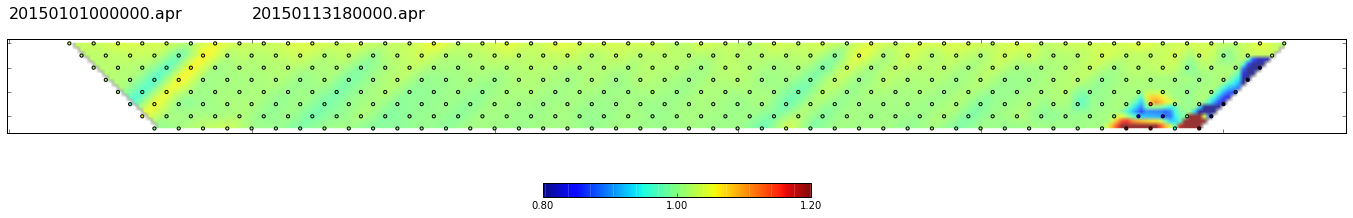

In [11]:
vizDCdiff(50)

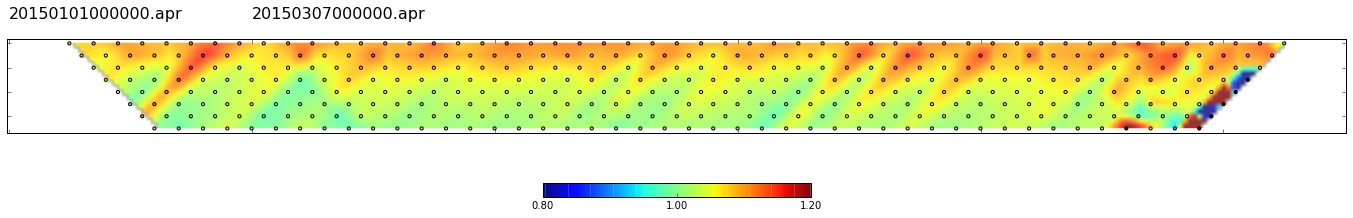

In [12]:
vizDCdiff(250)

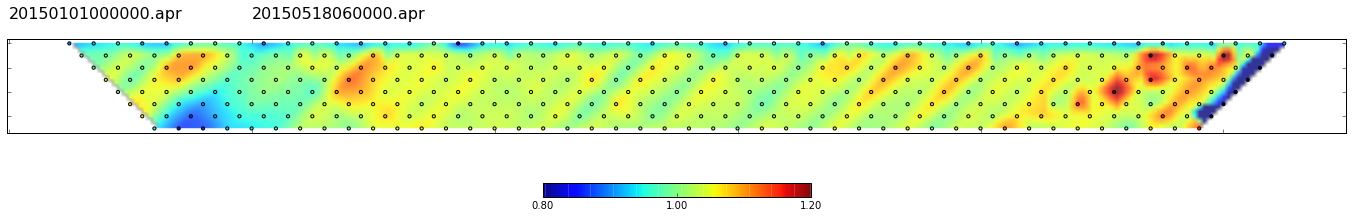

In [13]:
vizDCdiff(450)

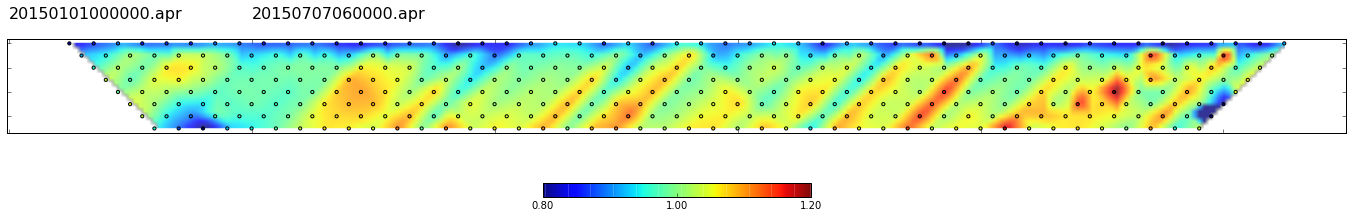

In [14]:
vizDCdiff(650)

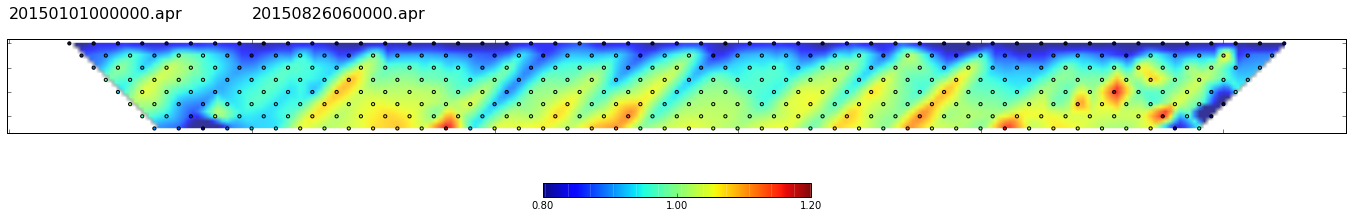

In [15]:
vizDCdiff(850)

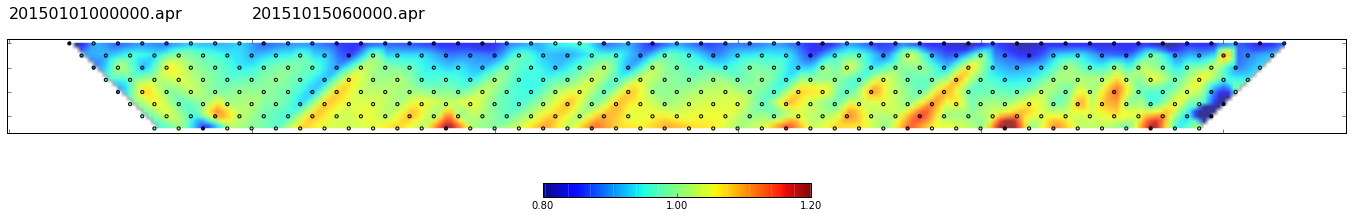

In [16]:
vizDCdiff(1050)

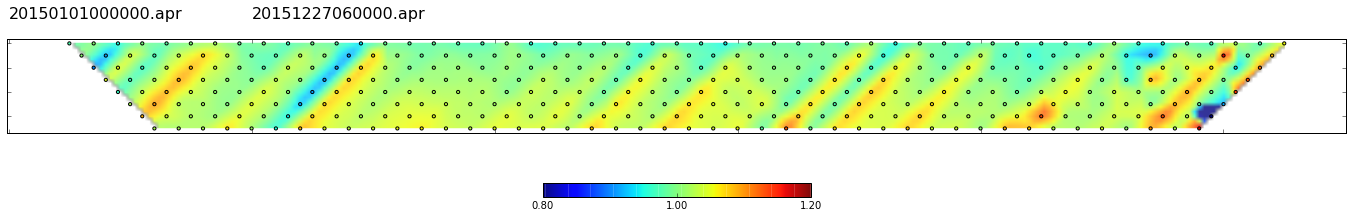

In [17]:
vizDCdiff(1250)